In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Synthetic dataset 1

In [2]:
def dataset1(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.normal(mu, sigma, 1)[0], np.random.normal(mu, sigma, 1)[0]]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            mu += 0.5 * N
            L += [1]
        else:
            L += [0]
        T += [i]
        ax = 0.6 * X[i-1] - 0.5 * X[i-2] + np.random.normal(mu, sigma, 1)[0]
        X += [ax]
    return np.array(X).reshape(-1, 1), np.array(L)

In [3]:
dir_path = "../data/synthetic_dataset_1/"
N_tot = 20000

for i in range(10):
    
    X, L = dataset1(period=2000, N_tot=N_tot)
    R1 = 5 * np.random.normal(0, 1, len(X)).reshape(-1, 1)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X
    df['X2'] = R1
    df['Label'] = L
    df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

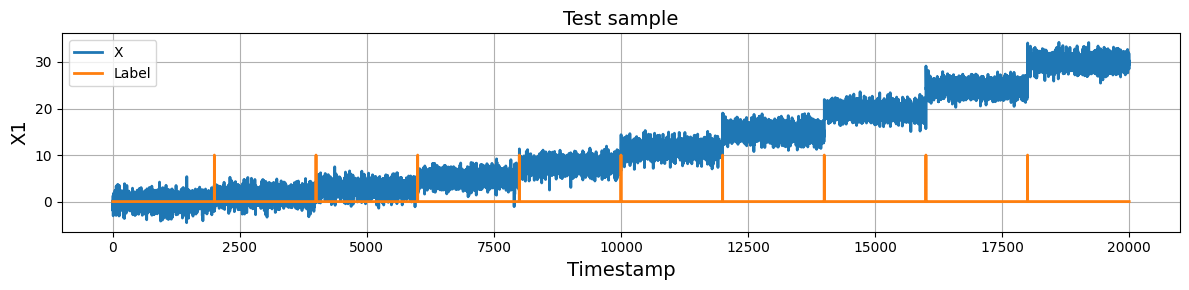

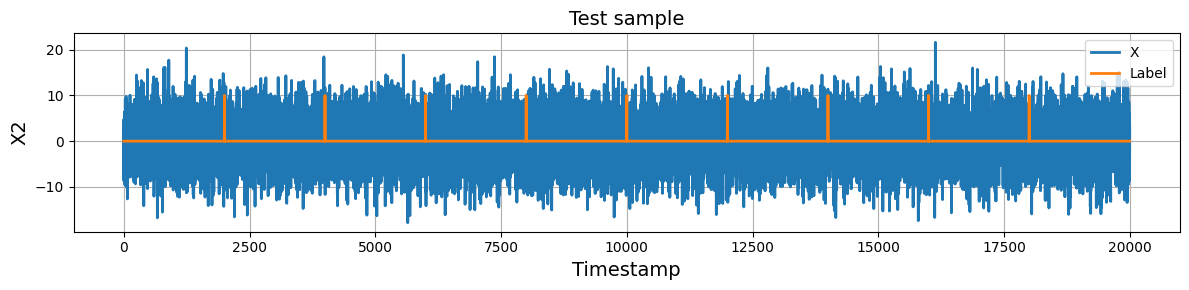

In [4]:
# Display test sample
for i in range(2):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(True)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 2

In [5]:
def dataset2(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.normal(mu, sigma, 1)[0], np.random.normal(mu, sigma, 1)[0]]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            L += [1]
        else:
            L += [0]
        if N % 2 == 1:
            sigma = 1
        if N % 2 == 0:
            sigma = 1 + 0.25 * N#np.log(np.e + N / 1.)
        T += [i]
        ax = 0.6 * X[i-1] - 0.5 * X[i-2] + np.random.normal(mu, sigma, 1)[0]
        X += [ax] 
    return np.array(X).reshape(-1, 1), np.array(L)

In [6]:
dir_path = "../data/synthetic_dataset_2/"
N_tot = 20000

for i in range(10):
    
    X, L = dataset2(period=2000, N_tot=N_tot)
    R1 = 5 * np.random.normal(0, 1, len(X)).reshape(-1, 1)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X
    df['X2'] = R1
    df['Label'] = L
    df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

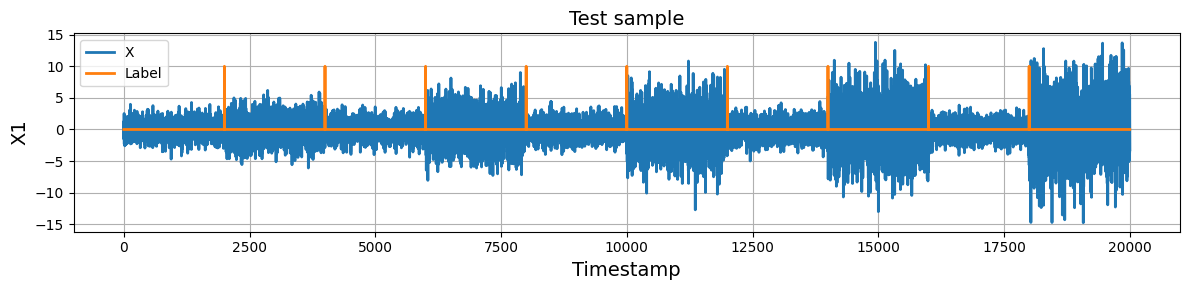

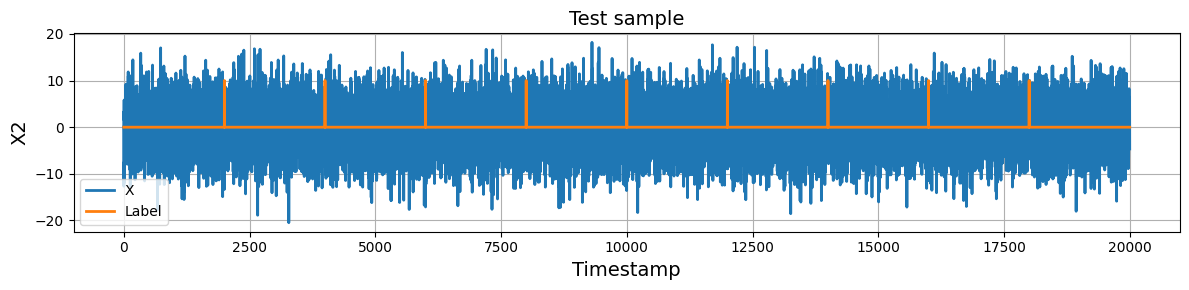

In [7]:
# Display test sample
for i in range(2):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(True)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 3

In [8]:
def dataset3(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.multivariate_normal(mean=[0, 0], cov=[[1, -0.8], [-0.8, 1]], size=1)[0], 
         np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.8],  [ 0.8, 1]], size=1)[0]]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            L += [1]
        else:
            L += [0]
        if N % 2 == 1:
            cov = [[1, -0.8-0.002*N], [-0.8-0.002*N, 1]]
            #cov = [[1, -0.95], [-0.95, 1]]
        if N % 2 == 0:
            cov = [[1, 0.8+0.002*N], [0.8+0.002*N, 1]]
            #cov = [[1, 0.95], [0.95, 1]]
        T += [i]
        ax = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=1)[0]
        X += [ax]
    return np.array(X), np.array(L)

In [9]:
dir_path = "../data/synthetic_dataset_3/"
N_tot = 20000

for i in range(10):
    
    X, L = dataset3(period=2000, N_tot=N_tot)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['X2'] = X[:, 1]
    df['Label'] = L
    df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

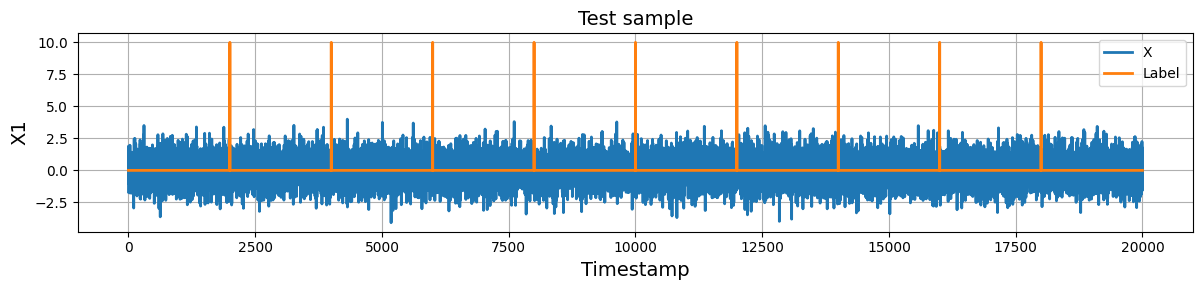

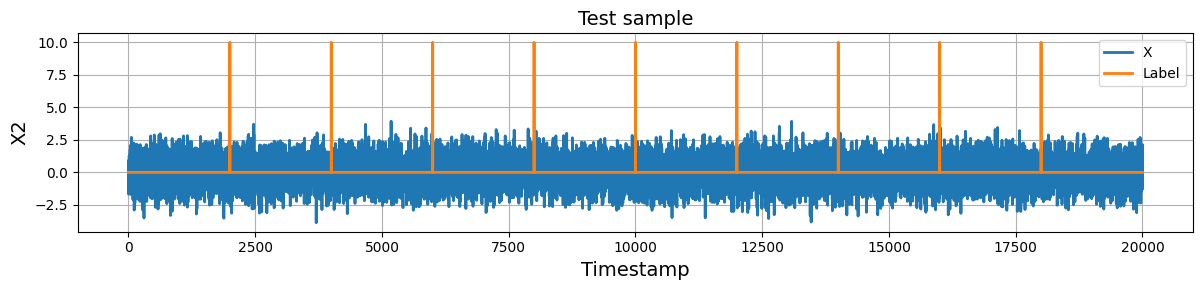

In [10]:
# Display test sample
for i in range(2):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(True)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Synthetic dataset 4

In [11]:
def dataset4(period=200, N_tot=1000):
    mu = 0
    sigma = 0.8
    w = 1.
    N = 1
    
    T = [0, 1]
    X = [np.sin(w * 0) + np.random.normal(0, 0.5, 1), 
         np.sin(w * 1) + np.random.normal(0, 0.5, 1)]
    L = [0, 0]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            w = w * np.log(np.e + 0.5 * N)
            L += [1]
        else:
            L += [0]
        T += [i]
        ax = np.sin(w * i) + np.random.normal(0, 0.5, 1)
        X += [ax]
    return np.array(X).reshape(-1, 1), np.array(L)

In [12]:
dir_path = "../data/synthetic_dataset_4/"
N_tot = 20000

for i in range(10):
    
    X, L = dataset4(period=2000, N_tot=N_tot)
    T = np.arange(len(X))
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['Label'] = L
    df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

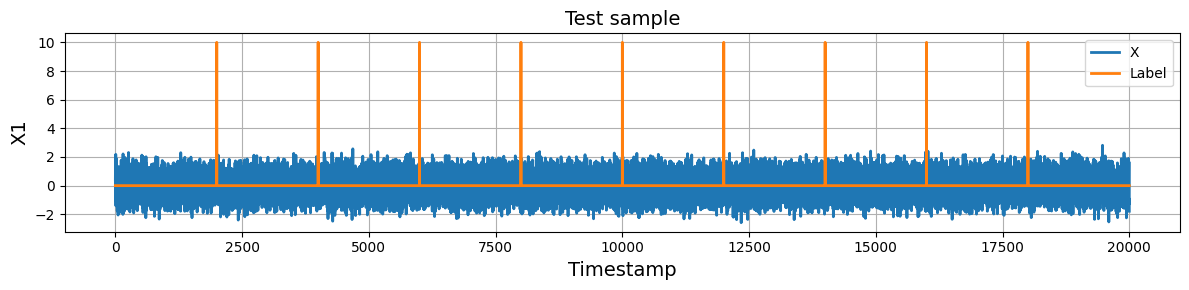

In [13]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(True)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Kepler

In [14]:
dir_path = "../data/kepler/"

In [15]:
data = pd.read_csv("kepler_data/kepler_2617.csv")
data = data.fillna(method='pad', axis=0)
data = data.fillna(method='bfill', axis=0)
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [5840, 6150, 13015, 13320, 20187, 20512, 27356, 27677, 34531, 34838, 41707, 42015]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_2617.csv", index=False)

C:\Users\evanr\AppData\Local\Temp\ipykernel_19856\937499096.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='pad', axis=0)
C:\Users\evanr\AppData\Local\Temp\ipykernel_19856\937499096.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill', axis=0)


In [16]:
data = pd.read_csv("kepler_data/kepler_2619.csv")
data = data.fillna(method='pad', axis=0)
data = data.fillna(method='bfill', axis=0)
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [1750, 2055, 8923, 9234, 16095, 16404, 23266, 23580, 30438, 30749, 37613, 37924]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_2619.csv", index=False)

C:\Users\evanr\AppData\Local\Temp\ipykernel_19856\1761069437.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='pad', axis=0)
C:\Users\evanr\AppData\Local\Temp\ipykernel_19856\1761069437.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill', axis=0)


In [17]:
data = pd.read_csv("kepler_data/kepler_2620.csv")
data = data.fillna(method='pad', axis=0)
data = data.fillna(method='bfill', axis=0)
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [2423, 2734, 9602, 9908, 16768, 17080, 23947, 24257, 31118, 31427, 38288, 38605, 45473]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_2620.csv", index=False)

C:\Users\evanr\AppData\Local\Temp\ipykernel_19856\3283928589.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='pad', axis=0)
C:\Users\evanr\AppData\Local\Temp\ipykernel_19856\3283928589.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill', axis=0)


In [18]:
data = pd.read_csv("kepler_data/kepler_5622.csv")
#data = data.fillna(method='pad', axis=0)
#data = data.fillna(method='bfill', axis=0)
data = data.dropna()
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [808, 1081, 6005, 6284, 11200, 11473, 16402, 16674, 21587, 21861, 26787, 27059, 31982, 32254, 
            36651, 36928, 41852, 42120]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_5622.csv", index=False)

In [19]:
data = pd.read_csv("kepler_data/kepler_5624.csv")
#data = data.fillna(method='pad', axis=0)
#data = data.fillna(method='bfill', axis=0)
data = data.dropna()
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [2082, 2356, 7281, 7555, 12477, 12750, 17674, 17948, 22844, 23114, 28038, 28304, 
            33224, 33493, 37065, 37337]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_5624.csv", index=False)

In [20]:
data = pd.read_csv("kepler_data/kepler_5625.csv")
#data = data.fillna(method='pad', axis=0)
#data = data.fillna(method='bfill', axis=0)
data = data.dropna()
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [1446, 1716, 6626, 6897, 11662, 11938, 16867, 17136, 22062, 22334, 27255, 27533, 
            31281, 31556, 36480, 36755, 41671, 41955]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_5625.csv", index=False)

In [21]:
data = pd.read_csv("kepler_data/kepler_5626.csv")
#data = data.fillna(method='pad', axis=0)
#data = data.fillna(method='bfill', axis=0)
data = data.dropna()
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [2522, 2795, 7711, 7977, 12901, 13175, 18094, 18384, 23301, 23573, 28500, 28768, 
            33686, 33957, 38880, 39153]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_5626.csv", index=False)

In [22]:
data = pd.read_csv("kepler_data/kepler_9610.csv")
#data = data.fillna(method='pad', axis=0)
#data = data.fillna(method='bfill', axis=0)
data = data.dropna()
X = data[['PDCSAP_FLUX']].values
T = np.arange(len(X))
T_change = [178, 3164, 3404, 6386, 6630, 9626, 9868, 12693, 12930, 15913, 16155, 19138, 19381, 22376, 22616, 
            25603, 25843, 28829, 29068, 30904, 31132, 34129, 34367, 37352, 37590, 40579, 40818]
L = np.zeros(len(T))
L[T_change] = 1


df = pd.DataFrame()
df['Time'] = T
df['X1'] = X[:, 0]
df['Label'] = L
df.to_csv(dir_path+"kepler_9610.csv", index=False)

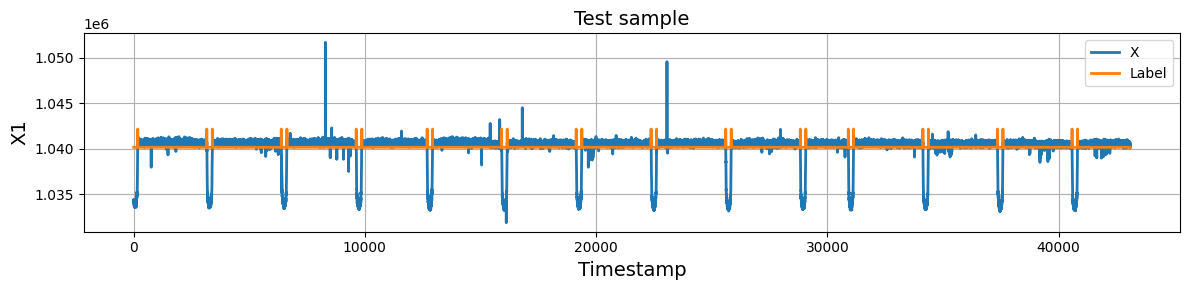

In [23]:
# Display test sample
for i in range(1):
    ax  = df["X"+str(i+1)]
    lab = df["Label"]*2000 + ax.mean()
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], ax, linewidth=2, label="X")
    plt.plot(df["Time"], lab, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(True)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# IRIS

In [24]:
dir_path = "../data/iris/"

In [25]:
iris_files =    ['JOHN.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.994.scale-1.csv',
                 'OTAV.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
                 'KONO.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
                 'ABKT.II.00.BHZ.2012.102.07.45.00.041-2012.102.09.59.59.960.scale-1.csv',
                 'POHA.IU.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
                 'ERM.II.00.BHZ.2012.102.07.45.00.020-2012.102.09.59.59.976.scale-1.csv',
                 'PASC.CI.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.994.scale-1.csv',
                 'KIEV.IU.00.BHZ.2012.102.07.45.00.010-2012.102.09.59.59.960.scale-1.csv',
                 'NIL.II.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
                 'TEIG.IU.00.BHZ.2012.102.07.45.00.031-2012.102.09.59.59.980.scale-1.csv',
                 'NATX.US.00.BHZ.2012.102.07.45.00.000-2012.102.09.59.59.999.scale-1.csv',
                 'KMI.IC.00.BHZ.2012.102.07.45.00.047-2012.102.09.59.59.997.scale-1.csv',
                 'PALK.II.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv',
                 'FFC.II.00.BHZ.2012.102.07.45.00.019-2012.102.09.59.59.969.scale-1.csv']

In [26]:
t_change = [8096, 8851, 7972, 7471, 8223, 7647, 8769, 7802, 7275, 8832, 8790, 7084, 6822, 8312]

for i in range(len(iris_files)):
    
    data = pd.read_csv("iris_data/"+iris_files[i], skiprows=18)
    if i in [0, 6, 10]:
        X = data[[' Sample']].values[::20]
    else:
        X = data[[' Sample']].values[::10]
    
    T = np.arange(len(X))
    
    noise_std = np.std(X[T < t_change[i]])
    X = X + np.random.normal(0, 3 * noise_std, len(X)).reshape(-1, 1)
    
    L = np.zeros(len(T))
    L[t_change[i]] = 1
    
    df = pd.DataFrame()
    df['Time'] = T
    df['X1'] = X[:, 0]
    df['Label'] = L
    df.to_csv(dir_path+"sample_%i.csv" % (i), index=False)

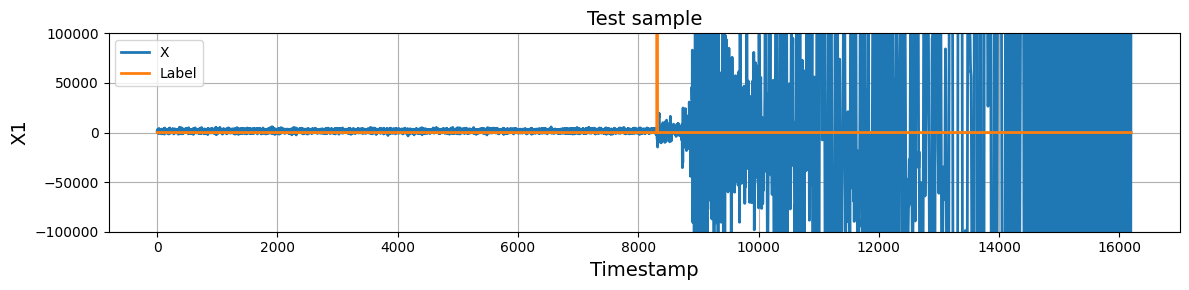

In [27]:
# Display test sample
for i in range(1):
    plt.figure(figsize=(12, 3.))
    plt.plot(df["Time"], df["X"+str(i+1)], linewidth=2, label="X")
    plt.plot(df["Time"], df["Label"]*10**6, linewidth=2, label="Label")
    plt.xlabel('Timestamp', size=14)
    plt.ylabel('X'+str(i+1), size=14)
    plt.grid(True)
    plt.title('Test sample', size=14)
    plt.legend(loc='best')
    plt.ylim(-10**5, 10**5)
    plt.tight_layout()
    plt.show()